## Group Project by Simon Driscoll, Yifan (Melody) Gao, Ping Tak Peter Tang

# Executive Summary

We applied data preprocessing followed by statistical analysis on a dataset derived from the Cook County Assessors Office data portal. Our goal is to examine if opportunity unfairness exists in the property tax appeal process offered by Cook County. Using several probit models on the dataset after some of its outlier and problematic elements are eliminated, we find both the appeal application and appeal granting processes exhibit opportunity unfairness. In particular, both processes favor high education background. In addition likelihood of an appeal application is positively correlated to being asian while negative correlated being hispanic. Within the cases of appeal, success is positively correlated to education level as well as the owner being white or asian. Once an appeal is granted, however, the monetary gain seems more or less fair. We speculate that these unfairness is caused by complicated requirements for filing and/or supporting documents needed for an appeal. In contrast, the monetary award calculation seems mechanical and consequently much fairer. These findings also suggest remedial steps on the appeal process and also other potential scenarios for possible studies of opportunity unfairness.

# 1. Introduction



In the first project for "Statistical Thinking for Machine Learning" we had to explore a dataset, consisting of a random sample of homes that have sold in the three regions of Cook County (the Northern Townships, the City of Chicago and the Southwest Townships) during tax years 2003-2018. Specificially, the aim was gain a rudimentary insight into the usefulness of this data in the property assessment process as the Cook County Assessor's Office (CCAO), who are interested in better understanding data relating to valuation of single family homes as part of the process of building an accurate valuation model.

The county also provides an appeal process for homeowners who want to challenge the assessed value, or more to the point, the tax being assessed.The appeals processes can occur (at four different agencies), in two forms: 1) appeals that provide new data about the property that the government did not have access to, 2) appeals that leverage known data to make a case (arguments based on comparable properties, for example).

An appeal may be unsuccessful, resulting in no change to the assessed taxation. In case of a successful appeal, the final reduction in tax assessed varies. This project uses statistical analysis on a provided dataset to try understanding in general whether the appeal process is a fair one. In particular, our goal is to understand whether there is bias or unfairness in the appeal system via two specific questions:

1) What variables influence whether a property owner appeals? 

2) What influences the monetary reduction they gain from appeal?

(This is reminiscent of the study Austin discusses as regards Neal and Johnson (1996), where they are worried that discrimination causes experience and skills observed in workers. It could be the case that discrimination comes much earlier in the process of employment through the acquisition of experience and skills and not necessarily show up in the labour market itself, one we take into account that the labour market is going to be discriminating across experience and skills. A similar thing may be occuring here. There may be discrimination or other factors influence whether someone makes an appeal (i.e. they may or may not make an appeal, both of these could occur with or without justification), and then we seek to understand the same thing: what influences the reduction they gain from an appeal once one is made. We hope to discover at both points in the process there is fairness, and we seek to reveal the case if not, through a good accurate model. Based on our study, we offer some concluding thoughts on the appeal system and our models.

Here is the outline of our study
 * In Section 2, we clean and prepare of our data. This involves basic examination of the dataset's characteristics, removal of missing and irrelevant data and removal of outliers. We applied care in data removal so as to not over removing entire rows of data simply because some fields not considered relevant to our study contain NaNs. We also developed an kurtosis based outlier removal process that is more statiscally sound than a naive scheme using IQR. We considered appropriate data transformations and applied logarithmic transform on several of the dollar-valued variables as their distribution in the logarithmic domain exhibits a much more normal-like shape.
 * In Section 3, we answer the first question using a probit model for binary classification. Our process involves visualizing first a number of variables against the probability of an appeal being filed. As the dataset only consists of a binary value on whether an appeal is filed or not, we use a binning methodology, gathering groups of data point near a particular variable value and computes the fraction of appeal application within that sub-population. This process allows to confidently pick the set of independent variables, and their squared valaus for a couple of them as our regressors. The statistical results strongly suggest that the significant factors contributing to the likelihood of appeal are that of the initial assessed value, tax and sale price, and education level of an owner and also if the owner is of asian or hispanic race. The last few factors concerning education level and race is reasonably interpreted as opportunity unfairness.
 * In Section 4, we answer the second question using a simple OLS regression as the appealed amount of a successful appeal is a continuous variable. We first examine a transitional question: What factors influence the success of an appeal. Our motivation is that monetary gain from a successful appeal rely on a conditioned dataset, which is not only an appeal is filed, but that the application is successful. There could be some unfairness on granting an appeal even none exists on the monetary reward once a case is granted. For this transistional question we again uses a probit model. The methodologies employed here are similar to those we used in the second question. Our findings suggest that the success of an appeal are influenced by the initial assessed value, education level of an owner and also if the owner is white or asian. Except for assessed value, all these factors suggest opportunity unfairness exists in terms of the success of an appeal. On the other hand, we found no significant factors affecting the monetary gain other than the initial assessed value of a property.
 * In Section 5, we offer some concluding thoughts on our model and the appeal system.

# 2. Dataset Cleaning and Preparation
The main steps taken in this section are as follows.
 * Apply basic dataframe utilities such as looking at its info, a few items, unique fields, counting NaNs and missing data, data characteristics, etc. This is accompanied by understanding the accompanied dictionary file. 
 * Cleaning up by removing non-essential data, NaNs, and misleading values. For example, there are over 30% of NaNs in the fields of pdir, square footage and number of bedrooms, which we deem non-essential. Thus we omit these fields in the first place. The important column of "appeal" appears to use NaN to encode an appeal not applied, whereas an appeal value of 0 obviously suggests an attempted but fail appeal. We therefore recode appropriately. Fianlly, we observed that there are a very small amount of negative values in the initial assessed values "av1". As negative values do not make sense and they are few in numbers (under 200 among 19 thousand data items), we simply filter them out.
 * We remove outliers using an iterative process based on kurtosis and test the insignificance of the removed data using OLS to compare a model before and after outliers removal.
 * We apply appropriate transformation, mainly the logarithm to several of the dollar-figured columns.
 * We normalized the race composition so that the sum of all percentages from the four recorded races equals 1.0. This normalization is necessary as in the original data, this sum often deviate from 1.0 rather significantly. We note that this normalization make these four race category linearly dependent and thus care is subsequently taken when including them into various models.

### 2.1 Data Overview and Set Up:
 * Import basic libraries, load data set, simple inspection for basic characteristics 
 * Simple inspection for basic characteristics 
 

In [ ]:
#Basic imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#Load data into colab from personal github account.
#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92 explains ways to load data into colab
url = 'https://raw.githubusercontent.com/PingTakPeterTang/Coursera-Adv-Stat-Thinking/main/project2-data.csv'
# Create orig/backup copy in case it is needed.
df_orig = pd.read_csv(url)
# Create working dataframe.
df = pd.read_csv(url)

In [ ]:
## we performed various inspections such as df.info(), df.head(), df.columns, df['field'].unique() and also studied the dictionary dataset


### 2.2 NaN and mislaeding data removals
 * Recode the NaNs in "appeal" as -1
 * Create a 0-1 valued column of "attempted_appeal" 
 * Dropping the columns of pdir, square foot, and bed as they are deemed non-essential and contain many NaNs
 * Drop the rows where av1 is negative
 * Drop all NaNs in the remaining dataset



In [ ]:
print("Length of original dataset: ",len(df))
print("Length of the remaining one if we naively drop all NaNs: ",len(df.dropna()))
print("Simply dropping rows whenever NaN is present is inappropriate")

Length of original dataset:  19036
Length of the remaining one if we naively drop all NaNs:  4023
Simply dropping rows whenever NaN is present is inappropriate


In [ ]:
# We create an attempted appeals column before we replace NaNs
# in the appeals column.
df["attempted_appeal"] = np.array(~df["appeal"].isna(),dtype=int)
values = {"appeal": -1}
df.fillna(value=values,inplace=True)



In [ ]:
def nan_ratio_f(df):
  for field in df.columns:
    nan_ratio = 1. - df[field].dropna().shape[0]/df.shape[0]
    nan_ratio *= 100.
    print("%20s NaN ratio is %2.0f%%"%(field,nan_ratio))
nan_ratio_f(df)

               pin14 NaN ratio is  0%
                 tri NaN ratio is  0%
                pdir NaN ratio is 29%
             pstreet NaN ratio is  0%
               pcity NaN ratio is  0%
               tcity NaN ratio is  0%
               condo NaN ratio is  0%
                 av1 NaN ratio is  0%
               value NaN ratio is  0%
               taxes NaN ratio is  0%
           homeowner NaN ratio is  0%
               white NaN ratio is  1%
               black NaN ratio is  1%
            hispanic NaN ratio is  1%
               asian NaN ratio is  1%
             medhinc NaN ratio is  1%
             poverty NaN ratio is  1%
             college NaN ratio is  1%
          squarefoot NaN ratio is 27%
                beds NaN ratio is 27%
           walkscore NaN ratio is  0%
             walkfac NaN ratio is  0%
          elem_score NaN ratio is  0%
   high_school_score NaN ratio is  0%
    avg_school_score NaN ratio is  0%
              appeal NaN ratio is  0%
    attempte

In [ ]:
#Drop the non-essential columns of squarefoot, beds, and pdir
df.drop(columns=['squarefoot', 'beds', 'pdir'], inplace=True)

In [ ]:
nan_ratio_f(df)

               pin14 NaN ratio is  0%
                 tri NaN ratio is  0%
             pstreet NaN ratio is  0%
               pcity NaN ratio is  0%
               tcity NaN ratio is  0%
               condo NaN ratio is  0%
                 av1 NaN ratio is  0%
               value NaN ratio is  0%
               taxes NaN ratio is  0%
           homeowner NaN ratio is  0%
               white NaN ratio is  1%
               black NaN ratio is  1%
            hispanic NaN ratio is  1%
               asian NaN ratio is  1%
             medhinc NaN ratio is  1%
             poverty NaN ratio is  1%
             college NaN ratio is  1%
           walkscore NaN ratio is  0%
             walkfac NaN ratio is  0%
          elem_score NaN ratio is  0%
   high_school_score NaN ratio is  0%
    avg_school_score NaN ratio is  0%
              appeal NaN ratio is  0%
    attempted_appeal NaN ratio is  0%


In [ ]:
# Remove "av1" that has a negative value
df = df[df['av1'] >= 0.]

In [ ]:
# Finally, dropping the remaining NaNs naively is reasonable in not deleting too much data
df.dropna(inplace=True)


### 2.3 Outliers investigation and removal
 * We examine skew and kurtosis, using Hair et al. (2010) and Bryne (2010) as a guideline to look for skew beyond the range of +-2 and kurtosis within 7
 * We devised an iterative process to remove outliers. For example, we iteratively remove the maximum of a particular field until the kurtosis stops exceeding 7.0

**Outliers Investigation**

In [ ]:
# Whilst not all of these have meaning in the same way we simply list all 
# numeric columns and stratify later.

# We prepare a list of all numeric columns to calculate their kurtosis/skew.

numeric_columns=["pin14","av1","value","taxes","homeowner","white","black","hispanic","asian","medhinc","poverty","college","walkscore","elem_score","high_school_score","avg_school_score","appeal"]

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

One way of discovering outliers is by looking at kurtosis. We will look into the kurtosis for all relevant columns and then remove outliers in the proper procedure.

In [ ]:
# We measure kurtosis, correcting for bias 
# (and we make sure we do not give excess kurtosis)
print("Kurtosis:")
for col in numeric_columns:
    print(col, kurtosis(df[col], bias=False, fisher=False))

Kurtosis:
pin14 2.934664518018445
av1 55.491673147740485
value 186.44163680741786
taxes 63.18655325276015
homeowner 1.0770142947921257
white 2.847922743068662
black 4.22103233498797
hispanic 5.585994580940492
asian 5.189441206434589
medhinc 4.044684969144085
poverty 6.379093197400787
college 1.9362680593493278
walkscore 2.9813505811982535
elem_score 2.069881342713988
high_school_score 1.9110382033973965
avg_school_score 2.0070895285743444
appeal 256.13737736206167


"What about if most the variables that I have are normal and a few of them are not? In this case, is it possible to use the parametric tests?" that "Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7." 

In [ ]:
for col in numeric_columns:
    print(col,skew(df[col], bias=False))

pin14 0.953545791124941
av1 4.676979333638381
value 8.22375795044013
taxes 4.299177812670428
homeowner 0.2778852955432029
white -0.9488467125229697
black 1.6313474526100964
hispanic 1.8459350419910372
asian 1.3756716828216957
medhinc 0.7951332978747016
poverty 1.5944257893994254
college 0.44640271166223777
walkscore -0.8588368451726965
elem_score -0.04006365325674995
high_school_score 0.0039345628495953446
avg_school_score -0.08459453143318235
appeal 12.05460587926781


In [ ]:
kurt7=[]
for col in numeric_columns:
    if (kurtosis(df[col], bias=False, fisher=False) > 7) or (kurtosis(df[col], bias=False, fisher=False) < -7):
      kurt7.append(col)
if len(kurt7)>0:
  print(f"The columns: {*kurt7,} have a kurtosis of magnitude greater than 7.")

The columns: ('av1', 'value', 'taxes', 'appeal') have a kurtosis of magnitude greater than 7.


In [ ]:
skew2=[]
for col in numeric_columns:
    if (skew(df[col], bias=False) > 2) or (skew(df[col], bias=False) < -7):
      skew2.append(col)
if len(skew2)>0:
  print(f"The columns: {*skew2,} have a skew of magnitude greater than 2.")

The columns: ('av1', 'value', 'taxes', 'appeal') have a skew of magnitude greater than 2.


In [ ]:
outlier_variables=[]
for i in skew2:
  if i in kurt7:
    outlier_variables.append(i)

In [ ]:
# Columns in outlier_variables all have BOTH a |kurtosis|>7 and a |skew|>2.
# These may be eligible for outlier removal/data treatment/conditioning and we plot density-histograms of
# these columns and as boxplots.

In [ ]:
print(outlier_variables)

['av1', 'value', 'taxes', 'appeal']


### Outliers Visualisations

'av1' - The first pass assessed value. Assessed value from CCAO prior to any appeal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


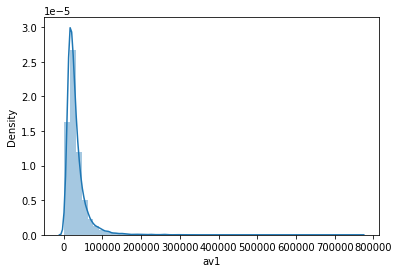

In [ ]:
sns.distplot(df['av1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


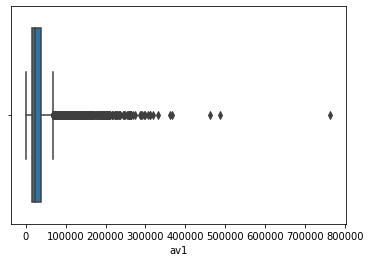

In [ ]:
sns.boxplot(df['av1'])

**'value'** - The property’s actual sale value when it sold.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


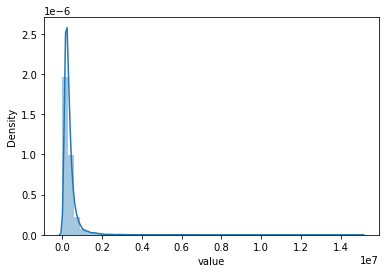

In [ ]:
sns.distplot(df['value'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


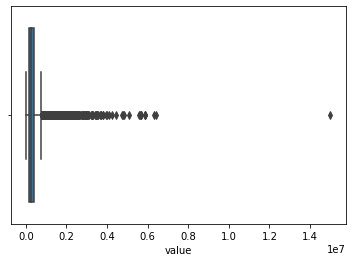

In [ ]:
sns.boxplot(df['value'])

**'taxes'** - The amount of annual taxes paid by property owner.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


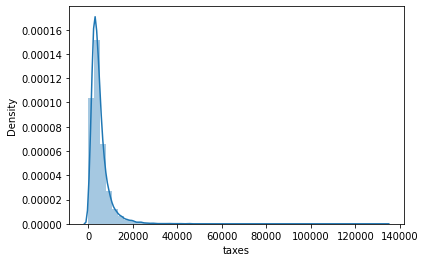

In [ ]:
sns.distplot(df['taxes'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


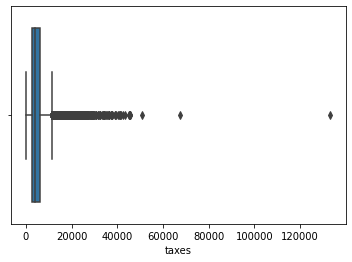

In [ ]:
sns.boxplot(df['taxes'])

**'appeal'** - 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


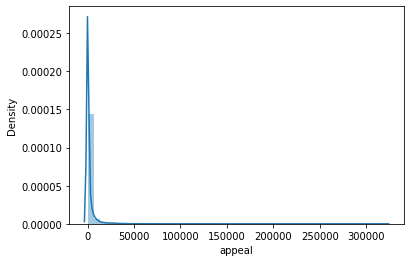

In [ ]:
sns.distplot(df['appeal'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


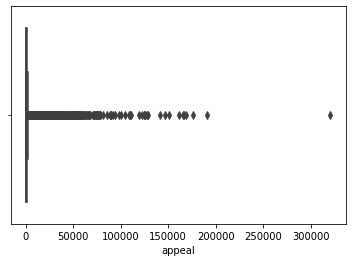

In [ ]:
sns.boxplot(df['appeal'])

### Understanding Outliers

Grubbs defines outliers as "As outlier is one that appears to deviate markedly from other members of the sample in which it occurs."

By this measure, our kurtosis/skew measures seem to have done a useful job at identifying outliers - from choosing those with high kurtosis/skew, we see from boxplots directly the existence of outliers. This would be a more rigorous way and definitely suffice for Statistical Thinking for Machine Learning, where we could apply a very crude measure: using IQR to 'identify' outliers. Furthermore, we would use this as a way to cut off outliers, above or below the 1.5*IQR.

This is somewhat without justification, or rigorous justification, and we advance our knowledge and undesrtanding in "Advanced Statistical Thinking for Machine Learning (ASTML) ". Here, we understand why we care about outliers. We care about them as they can have a big influence on OLS coefficient estimates, and whilst there is no statistical way to define an outlier for all purposes, we realise it is useful to define an outlier as one that influnces our coefficients. 

We have used a more mature statistical measure than IQR to do a preliminary identification of outliers, and achieve a statistically sound basic overview - we have confirmed we do have statistical outliers, and where. Skew *may* be 'remedied' with logarithmic transform. Whilst useful our primary focus is kurtosis. Yet kurtosis does not necessarily say anything about whether or at all why we should be doing anything to remove these outliers. 

We will see if we can illuminate further and do a rigorous statistical outlier removal (that is meaningful, including keeping samples with outliers in possibly and comparing) through adding this new method and understanding why we rule out outliers.

### Outlier Removal

Outliers are leverage points in data. For our purposes they are individual data points that can exert extreme influence on our statistical analysis, pulling the coefficients towards themselves and disrupting/confusing statistical analysis.
Austin mentions how we can test if outliers have influence: by going through the individual data and testing to see if they have a substantial influence on the analysis by removing the data points, one by one.
He gives an example of 32 companies' R&D intensity, the dependent, or Y, variable vs. sales (thousands $), the independent, or X, variable.
Our kurtosis and skew has been useful in allowing us to identify categories *with* outliers. The next step is to identify if they have heavy statistical influence on our data.
To be careful about this, we begin our exploratory data analysis, which aids our understanding of the data we are working with, which continues in later chapters.

In [ ]:
df_backup=df
# we are interested in outliers that change our statistics on the outcome variable.
# This we propose is "appeal". Appeal has -1's which are token values only. (NaNs)
# In order to see if a variable x has influence on variable y, we only look at non-NaN values.
nan_appeal_df=df[df['appeal']<0]
df=df[df["appeal"]>=0]

In [ ]:
#appeal is the y variable, we are interested in variables that influence it only
outlier_variables.remove('appeal')

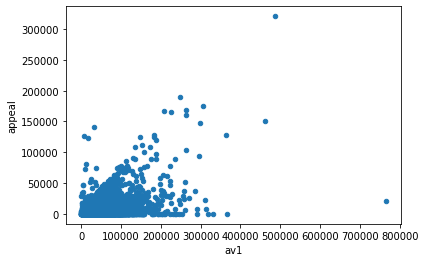

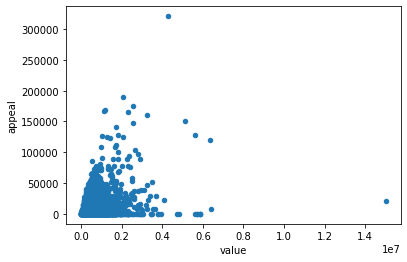

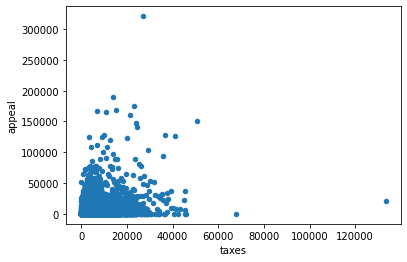

In [ ]:
#We focus on removing outliers from non-created columns first.
#Perhaps this will treat our data sufficiently
outlier_variables_cc_orig_columns=['av1', 'value', 'taxes']
for i in outlier_variables_cc_orig_columns:
  df.plot.scatter(x=i, y='appeal')

In [ ]:
# i.e. over 18,000 entries. This is not easy to visualise a table of beta/t-stat.

In [ ]:
# It also seems that many of the entries that cause outliers in one domain may 
# be the same houses causing outliers in another domain.

In [ ]:
# This appears to be houses with appeal above approximately 
# $200,000 and value larger than $500,000. We can do this without setting our own limits by eye.

# Outliers that have the largest effect are those that are outliers in both x and y, these
# alter the regression coefficient the most (as a "child on a see-saw" example Austin gave)
# Essentially in outlier removal, we want to remove those that have substantial influence the regression coefficient.

# We create subsets for all columns with outliers, sub-columns that have no outliers.
# As Austin says, "in large data sets we will need to drop groups", so we compare 
# if the outliers in that group have effect upon regression coefficient and statistic 
# of interest. If they do, we will drop those outliers. If they don't we will keep those
# outliers.

In [ ]:
subdf=df

# We cast a broad net, capturing all outliers:
# (This assumes the value of interest is always strictly positive.)
# (For negative and positive values change for max/min.)

while kurtosis(subdf['value'], bias=False, fisher=False)>7:
  adf=subdf.loc[subdf['value']!=subdf['value'].max()]
  subdf=adf

In [ ]:
subdf.shape

(8554, 24)

In [ ]:
df.shape

(8735, 24)

In [ ]:
from scipy import stats
def compare_with_without_outliers(df_full,df_without_outliers,column_name):
  x_variable=column_name
  beta_one, beta_zero, r_val, p_val_beta_1, stderr_beta_1 = stats.linregress(x = df_without_outliers[x_variable], y = df_without_outliers["appeal"])
  print(f"The OLS regression line for: {column_name} and value, without outliers, is y =%f + %fx" % (beta_zero, beta_one))
  print(f"With r_val:{r_val}, p_val_beta_1: {p_val_beta_1}, stderr_beta_1: {stderr_beta_1}.")
  beta_one, beta_zero, r_val, p_val_beta_1, stderr_beta_1 = stats.linregress(x = df_full[x_variable], y = df_full["appeal"])
  print(f"The OLS regression line for: {column_name} and value, in the full dataset is y =%f + %fx" % (beta_zero, beta_one))
  print(f"With r_val:{r_val}, p_val_beta_1: {p_val_beta_1}, stderr_beta_1: {stderr_beta_1}.")


In [ ]:
compare_with_without_outliers(df,subdf,'value')

The OLS regression line for: value and value, without outliers, is y =131.769986 + 0.009838x
With r_val:0.3072966321087192, p_val_beta_1: 1.7536142222411254e-186, stderr_beta_1: 0.0003294447568297951.
The OLS regression line for: value and value, in the full dataset is y =515.573664 + 0.009100x
With r_val:0.36439193351525023, p_val_beta_1: 1.6133828429061746e-272, stderr_beta_1: 0.00024886955728973127.


In [ ]:
# In week 5 at the end of the lectures in ASTML Austin notes that the standard error
# of the regression is v useful when analysing the impact of workers compensation insurance.
# We calculate the t-test via the beta/(standard error of beta).
# Austin notes we need this to be roughly 2 to reject the null hypothesis, or
# with a high p-value there is "no reasonable way that we can reject the null hypothesis that the
# change in policy had no effect". Here we see v small p-values, indicating it is extremely unlikely that
# these are highly unlikley to have no effect on the coefficient of the regression.
# Therefore our thinking is as follow: we will remove outliers that have an influence
# on the regression. They may have substnatial influence on the regression (e.g. av1) or a lesser
# influene (e.g. taxes), but if we cannot reject the null hypothesis and they have an effect on the regression,
# we will remove them. Therefore we identify all outliers via kurtosis, we plot/understand them,
#  remove these max/min values for comparison, and if they have an statistical effect on the regression we remove
# that group. Culminating in the final lectures of ASTML this is a substantially more sophisticated 
# approach in our understanding than STML, removing via 1.5*IQR. 

In [ ]:
def plot_regress(df,column_name):
  beta_one, beta_zero, r_val, p_val_beta_1, stderr_beta_1 = stats.linregress(x = df[column_name], y = df["appeal"])
  real_xs = df[column_name]
  predicted_ys = []
  
  for x in real_xs:
    predicted_y = beta_zero + beta_one*x
    predicted_ys.append(predicted_y)

  sns.lineplot(x=df[column_name],y=predicted_ys, color="red", label="Regression Line")
  sns.scatterplot(x=df[column_name], y=df["appeal"])

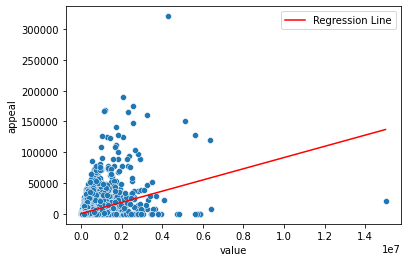

In [ ]:
plot_regress(df,'value')

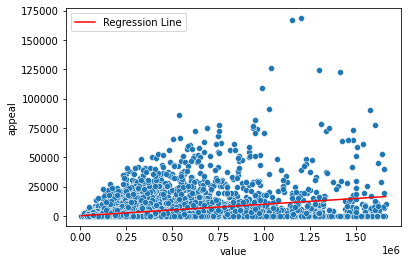

In [ ]:
plot_regress(subdf,'value')

In [ ]:
sum(df['attempted_appeal']==1)

8735

In [ ]:
# there is some influence of the outliers for value on the regression of appeal.
# we remove these outliers influencing the coefficient as it stands. and will review shortly.

In [ ]:
df=subdf

# We cast a broad net, capturing all outliers:
# (This assumes the value of interest is always strictly positive.)
# (For negative and positive values change for max/min.)

while kurtosis(subdf['taxes'], bias=False, fisher=False)>7:
  adf=subdf.loc[subdf['taxes']!=subdf['taxes'].max()]
  subdf=adf

In [ ]:
compare_with_without_outliers(df,subdf,'taxes')

The OLS regression line for: taxes and value, without outliers, is y =1863.854044 + 0.359545x
With r_val:0.1662210324416339, p_val_beta_1: 4.948303112631119e-54, stderr_beta_1: 0.02306745999991351.
The OLS regression line for: taxes and value, in the full dataset is y =1731.056022 + 0.385871x
With r_val:0.17792850630520124, p_val_beta_1: 8.751118709830429e-62, stderr_beta_1: 0.023076854339067514.


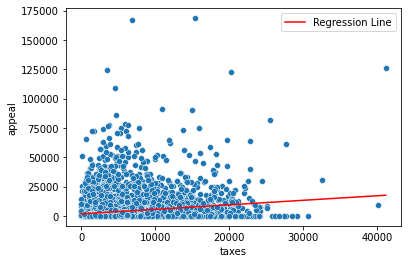

In [ ]:
plot_regress(df,'taxes')

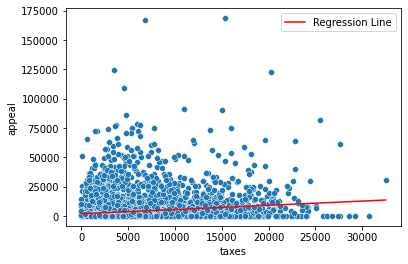

In [ ]:
plot_regress(subdf,'taxes')

In [ ]:
df=subdf

In [ ]:
subdf=df

# We cast a broad net, capturing all outliers:
# (This assumes the value of interest is always strictly positive.)
# (For negative and positive values change for max/min.)

while kurtosis(subdf['av1'], bias=False, fisher=False)>7:
  if (subdf['av1'].max())**2 > (subdf['av1'].min())**2:
    adf=subdf.loc[subdf['av1']!=subdf['av1'].max()]
  else:
    adf=subdf.loc[subdf['av1']!=subdf['av1'].min()]
  subdf=adf

In [ ]:
compare_with_without_outliers(df,subdf,'av1')

The OLS regression line for: av1 and value, without outliers, is y =-939.033843 + 0.135290x
With r_val:0.40596700101455374, p_val_beta_1: 0.0, stderr_beta_1: 0.003294475064785946.
The OLS regression line for: av1 and value, in the full dataset is y =-1336.605801 + 0.147789x
With r_val:0.4277229158866934, p_val_beta_1: 0.0, stderr_beta_1: 0.003377713998301328.


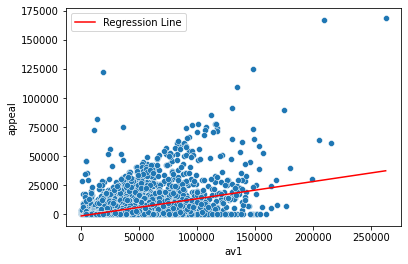

In [ ]:
plot_regress(df,'av1')

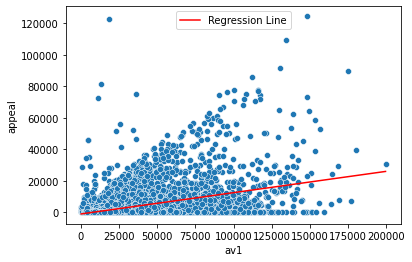

In [ ]:
plot_regress(subdf,'av1')

In [ ]:
df=subdf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8548 entries, 0 to 19035
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pin14              8548 non-null   float64
 1   tri                8548 non-null   object 
 2   pstreet            8548 non-null   object 
 3   pcity              8548 non-null   object 
 4   tcity              8548 non-null   object 
 5   condo              8548 non-null   object 
 6   av1                8548 non-null   float64
 7   value              8548 non-null   int64  
 8   taxes              8548 non-null   float64
 9   homeowner          8548 non-null   int64  
 10  white              8548 non-null   float64
 11  black              8548 non-null   float64
 12  hispanic           8548 non-null   float64
 13  asian              8548 non-null   float64
 14  medhinc            8548 non-null   float64
 15  poverty            8548 non-null   float64
 16  college            8548

In [ ]:
#variables cannot influence a nan value, we focused outlier work on the variable of interest
#and those that affect this variable, we now merge it to include both appeal and no-appeals in one df.
frames=[df,nan_appeal_df]
df = pd.concat(frames)

In [ ]:
df.shape

(18489, 24)

In [ ]:
sum(df['attempted_appeal']==0)

9941

At this point, our dataframe has been scoped for outliers via statistical measures, and those outliers that appear to be likely to have influence on the regression coefficients (with low p-values) have been removed.

**All Further Data Inspection, Transformations and Treatment**

Logarithms - We consider the impact of transformations before applying them.

In [ ]:
# We create a function that allows us to visualise variables of interest
# both with and without logarithmic transformations

def consider_log(df,field):
  val = df[df[field]>0&(~df[field].isna())][field]
  sns.displot(val); plt.title("Plot of "+field+" untransformed"); plt.show()
  sns.displot(val,log_scale=True); plt.title("Plot of "+field+" in logarithm"); plt.show()

In [ ]:
# Each graph is split into its own code cell, to avoid confusing and
# ease of understanding which graph should be compared against which.

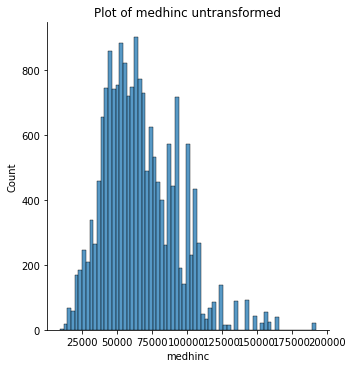

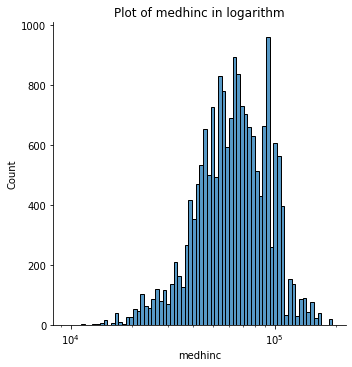

In [ ]:
consider_log(df,"medhinc")

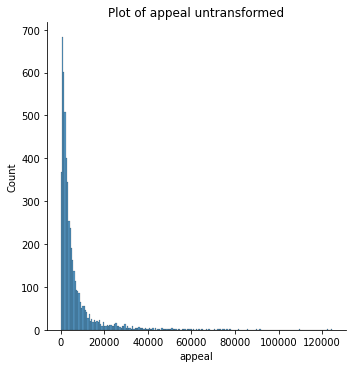

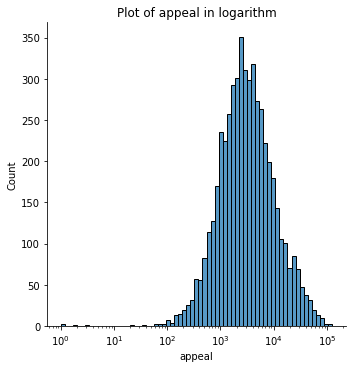

In [ ]:
consider_log(df,"appeal")

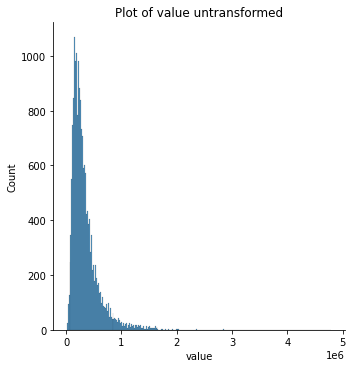

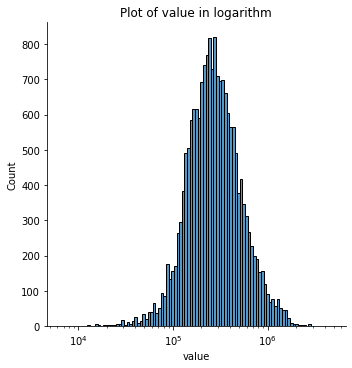

In [ ]:
consider_log(df,"value")

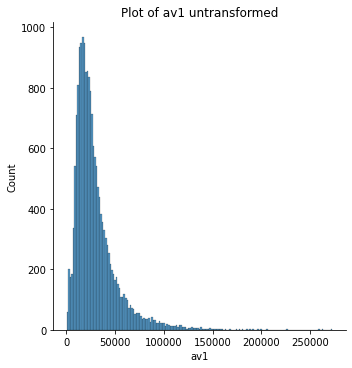

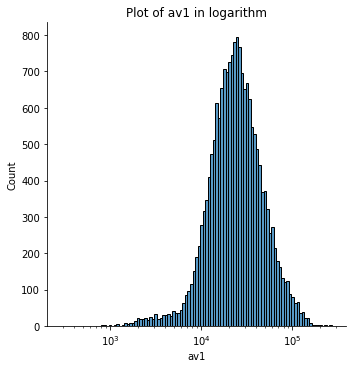

In [ ]:
consider_log(df,"av1")

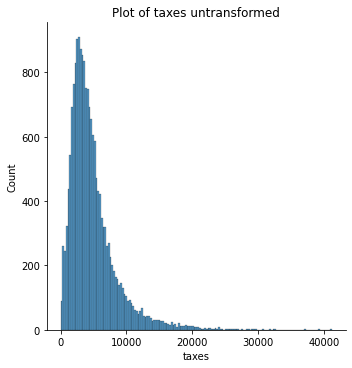

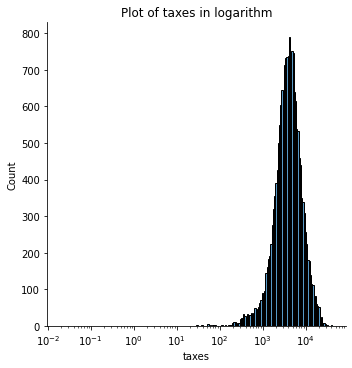

In [ ]:
consider_log(df,"taxes")

### Make Transformations

From the Log transformation attemption, we find that medhinc, appeal,value, av1,taxes and squarefoot are more close to normal distribution after log transformation. We will include the new log transformation variable into the model and using in further analysis

In [ ]:
df['log_appeal']=np.log(df['appeal'])
df['log_medhinc']=np.log(df['medhinc'])
df['log_value']=np.log(df['value'])
df['log_av1']=np.log(df['av1'])
df['log_taxes']=np.log(df['taxes'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Final Data Treatment

We may perform additional data treatment where/if relevant to the specific problem at hand. For now this section closes general basic data treatment to begin the questions.

Normalize race percentage to a sum of 1.0

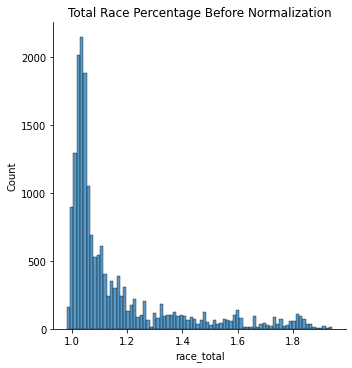

In [ ]:
race_total = 0.
for race in ["white","black","asian","hispanic"]:
  race_total += df[race] 
df["race_total"] = race_total
sns.displot(df["race_total"])
plt.title("Total Race Percentage Before Normalization")
plt.show()

for race in ["white","black","asian","hispanic"]:
  df[race+"_norm"] = df[race]/df["race_total"]

race_total = 0.
for race in ["white","black","asian","hispanic"]:
  race_total += df[race+"_norm"] 
df["race_total_norm"] = race_total


In [ ]:
df["race_total_norm"]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
16040    1.0
16041    1.0
16042    1.0
16043    1.0
16044    1.0
Name: race_total_norm, Length: 18489, dtype: float64

# 3. Question 1: Does the appeal system introduce opportunity unfairness?

The issue we are asked to identify is "the probability that a property owner will appeal", or what variables influence whether a property owner appeals? We first visualize several factors that affect whether the assessed value will be appealed. This forms a section of our exploratory data analysis (which continues throughout the project where relevant). We use the original "appeal" data with a NaN entry to classify it as a non-appealed case. We visualize the trend of appeal with some continous variables by way of binning. For example, we collect the percentage of college grads into a number of bins. Within a bin, the amount of college grads are similar and we examine the percentage of appeal cases in that bin. A trend of appreal percentage with percentage of college grads may become visible. 

The visual trend suggests for some quadratic relationship between initial assessed value, taxes paid, and value of the property. We then use a probit model first without quadratic values but including the racial composition. We noticed that the summation of racial composition from the original dataset does not equal 1.0 always. We first clean that up by a simple normalization. As the sum of the four races is always 1, these four variables are linearly dependent. Care was taken when we test various models not to include them all simultaneously.

We employ a probit model with various dependent variables to test the statistical significance of several of the main variables. We also tested the prediction accuracy using a simple threshold of 0.5, that is, a probability of 0.5 or more predict appealed taken. We summarize the findings as follow.

 * Percentage of college educated resident exhibits a significant position linear relation with percentage of appeals. This suggests that utilization of the appeal system strongly favors the more educated, thus contributing to an opportunity unfairness. 
 * While the amount of white or black do not bear statistical significance on whether an appeal is applied for, the percentage of asians and hispanics are statistically significant factors: the former positively correlated, latter, negatively. This in a sense is also an opportunity unfairness.
 * Other opportunity unfairness are visible. Using quadratic terms on assessed value and taxes levied, some U-shape trends are visible. Appeal is negatively correlated with poverty; with low assessed value or taxes levied, but become positively correlated as these values become high enough. This suggests that a worst spot exists for a certain segment of homeowners where perhaps they are not pressed by acute poverty on the one hand, while the appeal process presents high enough a hurdle for their educational background to overcome.


**Visualisations and data analysis supporting our finding (just summarized) - whether an appeal was *attempted* or not.**

In [ ]:
#Two functions to aid the model fitting
def visualize_attempted_appeal(df,fields,target='attempted_appeal',target_desc='prob. of appeal',desc=[],bin_size=100):
  #visualize the trend of attempted appeal w.r.t. a continuous field
  #we sort the field and bin into 100 bins
  #for each bin, we compute the percentage of attempted appeals
  Y = np.array(df[target])
  L = len(Y)
  nb_bins = L//bin_size
  if len(desc)==0:
    desc = [" "]*len(fields)
  for field,x_label in zip(fields,desc):
    x = np.array(df[field])
    Y = np.array(df[target])
    ind = np.argsort(x)
    x = x[ind]
    y = Y[ind]
    x_vec, y_vec = [],[]
    for i in range(nb_bins):
      #aa = x[i*bin_size:(i+1)*bin_size].mean()
      #bb = np.sum(y[i*bin_size:(i+1)*bin_size])/bin_size
      #print("... i ",i," ... aa is ", aa," ... bb is ", bb)
      x_vec.append(x[i*bin_size:(i+1)*bin_size].mean())
      y_vec.append(np.sum(y[i*bin_size:(i+1)*bin_size])/bin_size)
    sns.scatterplot(x=x_vec,y=y_vec)
    plt.title(field+" VS. "+target_desc)
    plt.xlabel(x_label)
    plt.ylabel(target_desc)
    plt.show()
    print("\n\n")
    
def prediction_score(binary_variable, prediction_prob, thres=0.5):
  predicted_binary = np.array(np.array(prediction_prob)>= thres,dtype=int)
  y = np.array(binary_variable==1,dtype=int).flatten()
  score = np.sum(predicted_binary==y)/len(predicted_binary)
  return score
  

In [ ]:
def plot_proportion(column):
  count2=df.groupby([column,'attempted_appeal'])['pin14'].count().unstack()
  condo_percents_df=count2.T.div(count2.T.sum()).T
  fig, ax = plt.subplots()
  condo_percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
  ax.set_xlabel("condo")
  ax.set_xticklabels([f" Not {column}",f"{column}"], rotation=0)
  ax.set_ylabel("Proportion")
  fig.suptitle(f"{column} vs. appeal attemption");

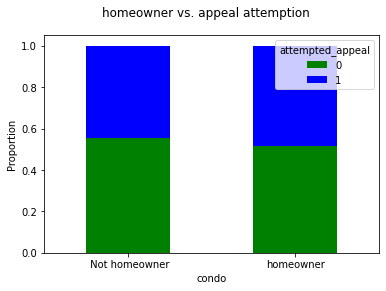

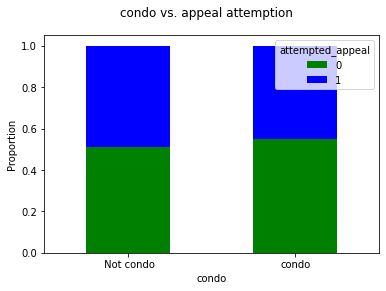

In [ ]:
plot_proportion("homeowner") 
plot_proportion("condo") 

Text(0.5, 0.98, 'Walkfac vs. appeal attemption')

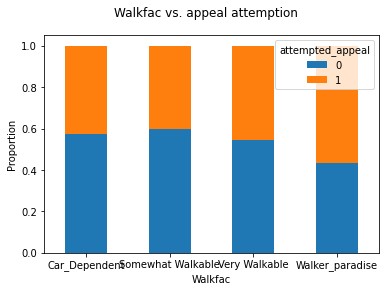

In [ ]:
mapping = {'Very Walkable': 3, 'Somewhat Walkable':2, "Walker's Paradise": 4,'Car-Dependent':1}
df['walkfac'] = df['walkfac'].astype('str')
df.replace({'walkfac': mapping})

count1=df.groupby(['walkfac','attempted_appeal'])['pin14'].count().unstack()
Walkfac_percents_df=count1.T.div(count1.T.sum()).T
fig, ax = plt.subplots()

Walkfac_percents_df.plot(kind="bar", stacked=True, ax=ax)
ax.set_xlabel("Walkfac")
ax.set_xticklabels(['Car_Dependent','Somewhat Walkable','Very Walkable','Walker_paradise'], rotation=0)
ax.set_ylabel("Proportion")

fig.suptitle("Walkfac vs. appeal attemption")

In [ ]:
def boxplots(norm):
  fig, ax = plt.subplots()
  sns.boxplot(x=norm, y="attempted_appeal", data=df, orient="h", palette={1:"blue", 0:"green"}, ax=ax)
  ax.get_yaxis().set_visible(False)
  fig.suptitle(f"{norm} vs. Appeal Decision")

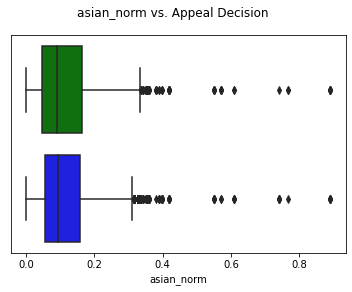

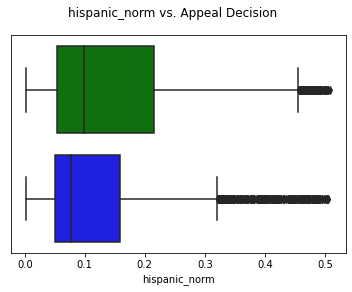

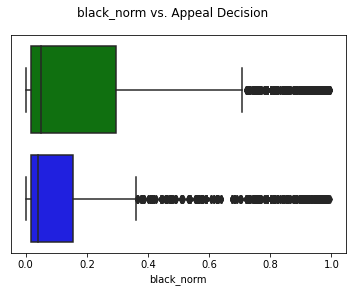

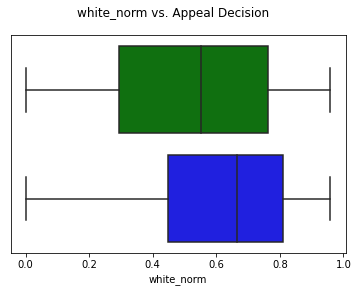

In [ ]:
list_race = ["asian_norm", "hispanic_norm", "black_norm", "white_norm"]
list_c = [boxplots(i) for i in list_race]

In [ ]:
def plot_count(column):
  fig, ax = plt.subplots()
  ax.hist(df[df["attempted_appeal"]==1][column], alpha=0.5, color="blue", label="appeal")
  ax.hist(df[df["attempted_appeal"]==0][column], alpha=0.5, color="green", label="did not appeal")
  ax.set_xlabel(column)
  ax.set_ylabel("Count of property")
  fig.suptitle(f"{column} vs. count of property")
  ax.legend();
  

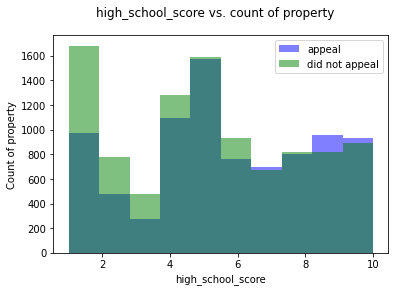

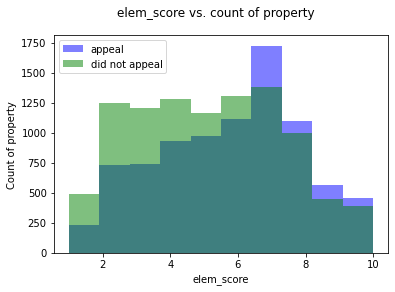

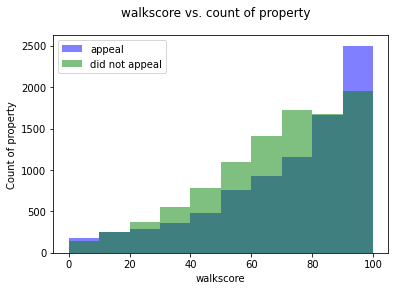

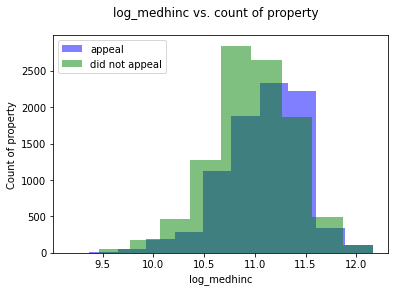

In [ ]:
list_factors=['high_school_score','elem_score','walkscore','log_medhinc']
list_c = [plot_count(i) for i in list_factors]

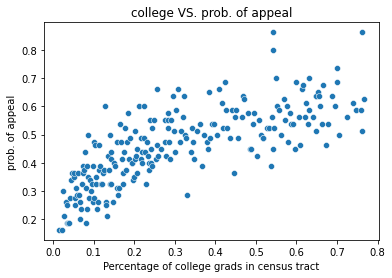

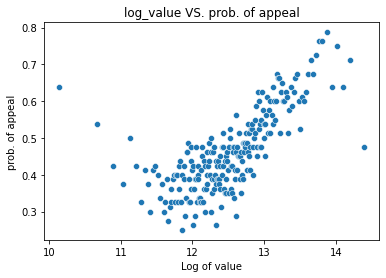

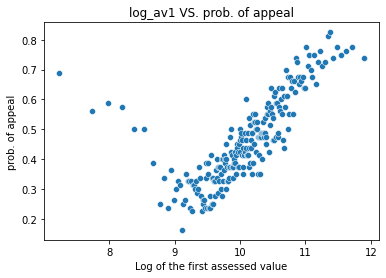

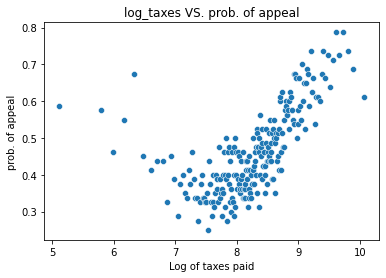

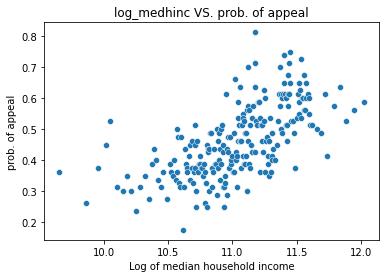

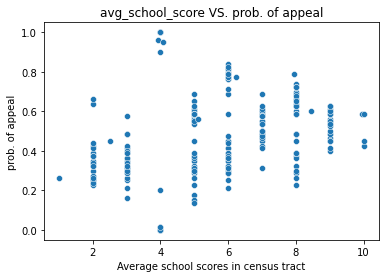

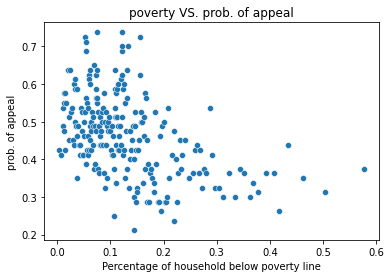

In [ ]:
fields = ["college", "log_value", "log_av1", "log_taxes", "log_medhinc", "avg_school_score", "poverty"]
desc = ["Percentage of college grads in census tract", "Log of value", "Log of the first assessed value", "Log of taxes paid"]
desc+=["Log of median household income", "Average school scores in census tract", "Percentage of household below poverty line"]

visualize_attempted_appeal(df,fields,desc=desc,bin_size=80)


In [ ]:
#Normalize the race composition so that the sum of the four races is always 1.0
race_total = 0.
for race in ["white","black","asian","hispanic"]:
  race_total += df[race] 
for race in ["white","black","asian","hispanic"]:
  df[race+"_norm"] = df[race]/race_total


**Probit Model**

In a series of Probit models, we examined models using columns of college, log_av1, log_value, log_taxes together with different combinations of race composition. While the prediction accuracy hovers around the 62 to 63 percentile, the statistical significance of the various factors became clear. 

Promted by some of the previous visualization, we added squared terms of some of the columns and examine the result of the Probit fitting. The prediction accuracy improved slightly, and the U-shape relationship can be better explained.


In [ ]:
def filter_IQR(df,fields):
  df_tmp = df
  for field in fields:
    xx = np.array(df_tmp[field].quantile([0.25,0.75]))
    iqr = xx[1]-xx[0]
    lo = xx[0]-1.5*iqr
    hi = xx[1]+1.5*iqr
    df_tmp = df_tmp[(df_tmp[field]<hi)&(df_tmp[field]>lo)]
  return df_tmp

In [ ]:
# We create an attempted appeals column.
# These results are summarized previously.
import statsmodels.api as sm
df_model1 = df

print("============================================================================")
print("  RUNNING VARIOUS PROBIT MODELS USING ONLY FIRST-ORDER TERMS OF COLUMNS")
print("============================================================================\n\n\n")
ind_variables = ['college','log_av1','log_value','log_taxes']
df_model1 = filter_IQR(df_model1, ind_variables)
dep_variable = ["attempted_appeal"]
for race in [["white_norm"],["black_norm"],["hispanic_norm"],["asian_norm"],["asian_norm","hispanic_norm"]]:
  X = df_model1[ind_variables+race]
  y = df_model1[dep_variable]
  X = sm.add_constant(X)
  PModel = sm.Probit(y,X)
  PResult = PModel.fit()
  predY = np.array(PResult.predict(X))
  print("\n\n=========================")
  formula = "Prob(attempted appeal) = PROBIT( linear_comb("
  for xx in ind_variables:
    formula += xx+","
  formula = formula
  for r in race:
    formula += r+","
  formula = formula[:-1] + ")"
  print("Probit model: "+formula)
  print("The prediction accuracy of this model is %.1f%%"%(100.*prediction_score(y,predY)))
  print(PResult.summary())
  print("\n\n")



  RUNNING VARIOUS PROBIT MODELS USING ONLY FIRST-ORDER TERMS OF COLUMNS



Optimization terminated successfully.
         Current function value: 0.639576
         Iterations 5


Probit model: Prob(attempted appeal) = PROBIT( linear_comb(college,log_av1,log_value,log_taxes,white_norm)
The prediction accuracy of this model is 63.9%
                          Probit Regression Results                           
Dep. Variable:       attempted_appeal   No. Observations:                17561
Model:                         Probit   Df Residuals:                    17555
Method:                           MLE   Df Model:                            5
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                 0.07221
Time:                        20:33:30   Log-Likelihood:                -11232.
converged:                       True   LL-Null:                       -12106.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err   

In [ ]:
#We omit "white" and "black" from the independent variables but add quadratic terms 
fields = ["log_value","log_av1","log_taxes"]
for field in fields:
  df_model1[field+"2"] = df_model1[field]*df_model1[field]

ind_variables = ['college','asian_norm','hispanic_norm','log_av1','log_value']
ind_variables += ['log_av12','log_value2']
dep_variable = ["attempted_appeal"]
X = df_model1[ind_variables]
y = df_model1[dep_variable]
PModel = sm.Probit(y,X)
PResult = PModel.fit()
predY = np.array(PResult.predict(X))
print("\n\n")
print("============================================================================")
print("  RUNNING A PROBIT MODEL WITH SQUARED TERMS OF SOME COLUMNS")
print("============================================================================\n\n\n")
print("We use college, asian, hispanic, log_av1, log_value, (log_av1)^2 and (log_value)^2")
print("The prediction accuracy of this model is %.1f%%"%(100.*prediction_score(y,predY)))
print(PResult.summary())

Optimization terminated successfully.
         Current function value: 0.636189
         Iterations 5



  RUNNING A PROBIT MODEL WITH SQUARED TERMS OF SOME COLUMNS



We use college, asian, hispanic, log_av1, log_value, (log_av1)^2 and (log_value)^2
The prediction accuracy of this model is 64.0%
                          Probit Regression Results                           
Dep. Variable:       attempted_appeal   No. Observations:                17561
Model:                         Probit   Df Residuals:                    17554
Method:                           MLE   Df Model:                            6
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                 0.07712
Time:                        20:35:37   Log-Likelihood:                -11172.
converged:                       True   LL-Null:                       -12106.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025 

In [ ]:
def call_probit(ind_variables,dep_variable):
  X = df_model1[ind_variables]
  y = df_model1[dep_variable]
  #X = sm.add_constant(X)
  PModel = sm.Probit(y,X)
  PResult = PModel.fit()
  predY = np.array(PResult.predict(X))
  print(PResult.summary())

In [ ]:
import statsmodels.api as sm
df_model1 = df
ind_variables = ['college','white_norm','black_norm','asian_norm','hispanic_norm','log_av1','log_value','log_taxes']
dep_variable = ["attempted_appeal"]
X = df_model1[ind_variables]
y = df_model1[dep_variable]
X = sm.add_constant(X)
PModel = sm.Probit(y,X)
PResult = PModel.fit()
predY = np.array(PResult.predict(X))

Optimization terminated successfully.
         Current function value: 0.638940
         Iterations 21


In [ ]:
def prediction_score(binary_variable, prediction_prob, thres=0.5):
  predicted_binary = np.array(np.array(prediction_prob)>= thres,dtype=int)
  y = np.array(binary_variable==1,dtype=int).flatten()
  score = np.sum(predicted_binary==y)/len(predicted_binary)
  return score

In [ ]:
# Let us do away with the race composition as indepedent variables
ind_variables = ['college','log_av1','log_value','log_taxes','log_medhinc','poverty']
dep_variable = ["attempted_appeal"]
X = df_model1[ind_variables]
y = df_model1[dep_variable]
#X = sm.add_constant(X)
PModel = sm.Probit(y,X)
PResult = PModel.fit()
predY = np.array(PResult.predict(X))
PResult.summary()

Optimization terminated successfully.
         Current function value: 0.640820
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:       attempted_appeal   No. Observations:                17319
Model:                         Probit   Df Residuals:                    17313
Method:                           MLE   Df Model:                            5
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.07074
Time:                        10:24:48   Log-Likelihood:                -11098.
converged:                       True   LL-Null:                       -11943.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
college         0.9678      0.054     18.020      0.000       0.863       1.073
log_av1         1.0869      0.041     26.256      0.000       1.006       1.168
log_value      -0.6250      0.034    -18.593      0.000      -0.691      -0.559
log_taxes      -0.1028      0.026     -3.882      0.000      -0.155      -0.051
log_medhinc    -0.2393      0.021    -11.315      0.000      -0.281      -0.198
poverty        -0.6638      0.122     -5.419      0.000      -0.904      -0.424
===============================================================================
"""

In [ ]:
print("The prediction accuracy of this model is %.1f%%"%(100.*prediction_score(y,predY)))

The prediction accuracy of this model is 64.0%


Let us add quadratic values of log_av1, log_taxes and log_medhinc

In [ ]:
fields = ["log_value","log_av1","log_taxes"]
for field in fields:
  df_model1[field+"2"] = df_model1[field]*df_model1[field]

In [ ]:
ind_variables = ['college','log_av1','log_value','log_taxes','log_medhinc','poverty']
ind_variables += ['log_value2','log_av12','log_taxes2']
dep_variable = ["attempted_appeal"]
X = df_model1[ind_variables]
y = df_model1[dep_variable]
#X = sm.add_constant(X)
PModel = sm.Probit(y,X)
PResult = PModel.fit()
predY = np.array(PResult.predict(X))
PResult.summary()


IndentationError: ignored

In [ ]:
call_probit(ind_variables,dep_variable)

Optimization terminated successfully.
         Current function value: 0.640820
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:       attempted_appeal   No. Observations:                17319
Model:                         Probit   Df Residuals:                    17313
Method:                           MLE   Df Model:                            5
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.07074
Time:                        10:26:07   Log-Likelihood:                -11098.
converged:                       True   LL-Null:                       -11943.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
college         0.9678      0.054     18.020      0.000       0.863       1.073
log_av1         1.0869    

# 4. Question 2: What influences the monetary reduction they gain from appeal?

We examine two issues. The question here considers a successful appeal and the previous question focused on appeal application. Hence we would like to first consider what are significant factors leading to a successful appeal. We then consider the question posed here directly: within the successful appeals, what influence the amount of monetary gain. We summarize our findings as follows.

 * The probability of a successful appeal is positively correlated to the initial assessed value, percentage of college graduates, being white or asian. 
 * Since the absolute amount of assessment reduction needs to be understood in the context of the assessed value, we use percentage of mometary gain of the initial assessed value as a metric. With this metric, we cannot reject the various null hypothesis that all the obvious factors bear no statistical significance. In other words, the main influencer of monetary gain is the initial assessed value itself.


**The following are the data analysis supporting our findings and visualisations for *successful appeals*.**

In [ ]:
#First extract a data frame just containing the those that applied for an appeal, then add a field to indicate its success
df_appealed = df[df['appeal']>=0.]
df_appealed['appeal_successful'] = np.array(df_appealed['appeal']>0.,dtype=int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


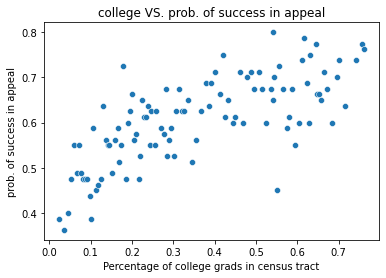

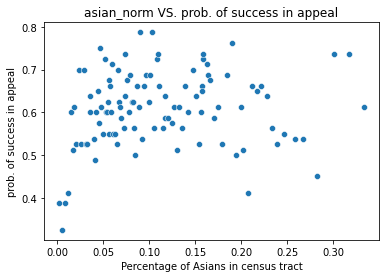

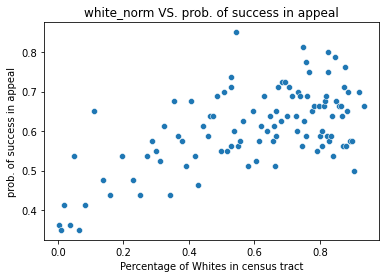

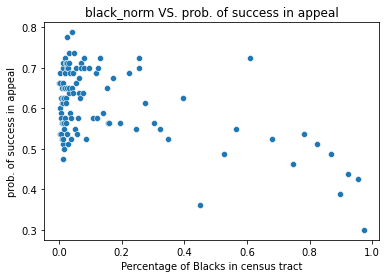

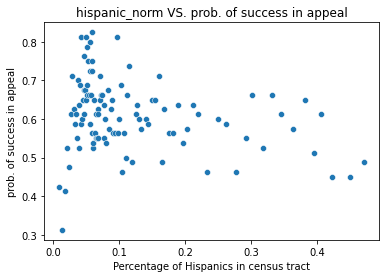

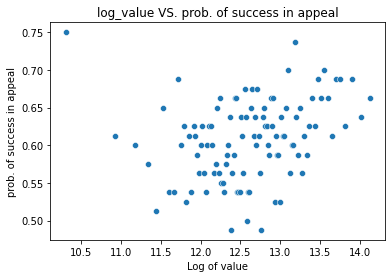

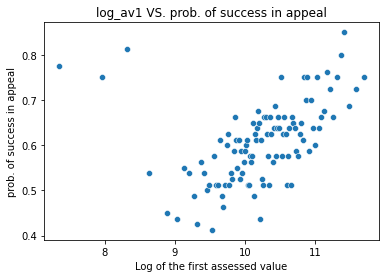

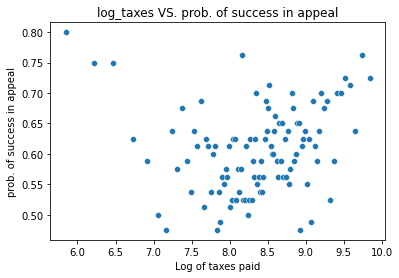

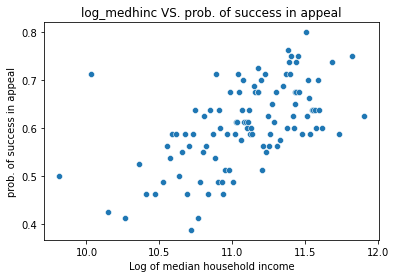

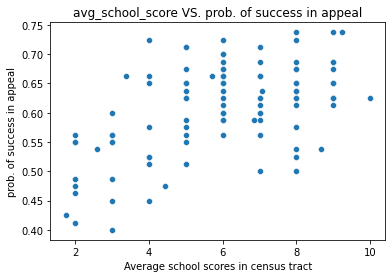

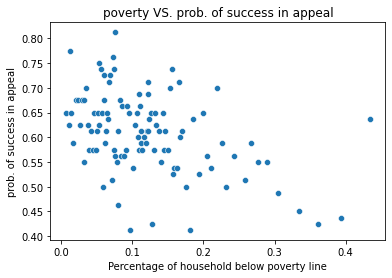

In [ ]:
##Visualize various factors with respect to appeal success
fields = ["college", "asian_norm", "white_norm", "black_norm", "hispanic_norm", "log_value", "log_av1", "log_taxes", "log_medhinc", "avg_school_score", "poverty"]
desc = ["Percentage of college grads in census tract", "Percentage of Asians in census tract", "Percentage of Whites in census tract", "Percentage of Blacks in census tract", "Percentage of Hispanics in census tract", "Log of value"]
desc += ["Log of the first assessed value", "Log of taxes paid", "Log of median household income", "Average school scores in census tract", "Percentage of household below poverty line"]

target = 'appeal_successful'
target_desc = 'prob. of success in appeal'

visualize_attempted_appeal(df_appealed,fields,target=target,target_desc=target_desc,desc=desc,bin_size=80)

In [ ]:
##Based on the visualization, we create a model to predict success of appeal. The main point is to investigate what factors are significant
df_model1_5 = df_appealed
ind_variables = ['college','log_av1','log_value','log_taxes','poverty','log_medhinc','avg_school_score']
df_model1_5 = filter_IQR(df_model1_5,ind_variables)
race = ['asian_norm','white_norm']
ind_variables += race
ind_variables.remove('log_medhinc')
ind_variables.remove('avg_school_score')
ind_variables.remove('poverty')
## add quadratic 
fields = ['log_value','log_taxes']
for field in fields:
  df_model1_5[field+"2"]=df_model1_5[field]*df_model1_5[field]
  ind_variables += [field+"2"]

dep_variable = ["appeal_successful"]
X = df_model1_5[ind_variables]
y = df_model1_5[dep_variable]
#X = sm.add_constant(X)
PModel = sm.Probit(y,X)
PResult = PModel.fit()
predY = np.array(PResult.predict(X))
print("\n\nThe prediction accuracy of this model is %.1f%%\n\n"%(100.*prediction_score(y,predY)))
PResult.summary()

Optimization terminated successfully.
         Current function value: 0.632815
         Iterations 5


The prediction accuracy of this model is 63.5%




<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:      appeal_successful   No. Observations:                 7704
Model:                         Probit   Df Residuals:                     7696
Method:                           MLE   Df Model:                            7
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                 0.05515
Time:                        20:59:24   Log-Likelihood:                -4875.2
converged:                       True   LL-Null:                       -5159.8
Covariance Type:            nonrobust   LLR p-value:                1.101e-118
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
college        0.7249      0.091      7.942      0.000       0.546       0.904
log_av1        1.1364      0.063     18.012      0.000       1.013       1.260
log_value     -0.2403      0.354     -0.679      0.497      -0.934       0.454
log_taxes     -0.9128      0.521     -1.751      0.080      -1.935       0.109
asian_norm     0.6343      0.206      3.073      0.002       0.230       1.039
white_norm     0.3447      0.082      4.218      0.000       0.185       0.505
log_value2    -0.0257      0.014     -1.794      0.073      -0.054       0.002
log_taxes2     0.0403      0.031      1.283      0.199      -0.021       0.102
==============================================================================
"""

Finally, given an appeal that is successful, what would influence the amount of assessment being reduced?
Measured as a percentage of the initial assessed value, this quantity seems not to be influenced by
many of the factors that were significant to our previous investigation. In other words, the main influence will be simply the
assessed value. Therefore, once an appeal is successful, the amount of monetary gain seems to offer no opportunity unfairness.



In [ ]:
df_appealed_success = df_appealed[df_appealed['appeal_successful']==1]
df_appealed_success['appealed_amount_pc'] = 100.*df_appealed_success['appeal']/df_appealed_success['av1']
df_appealed_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5201 entries, 2 to 19035
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pin14               5201 non-null   float64
 1   tri                 5201 non-null   object 
 2   pstreet             5201 non-null   object 
 3   pcity               5201 non-null   object 
 4   tcity               5201 non-null   object 
 5   condo               5201 non-null   object 
 6   av1                 5201 non-null   float64
 7   value               5201 non-null   int64  
 8   taxes               5201 non-null   float64
 9   homeowner           5201 non-null   int64  
 10  white               5201 non-null   float64
 11  black               5201 non-null   float64
 12  hispanic            5201 non-null   float64
 13  asian               5201 non-null   float64
 14  medhinc             5201 non-null   float64
 15  poverty             5201 non-null   float64
 16  colle

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import statsmodels.formula.api as sm
dep_variable = 'appealed_amount_pc'
indep_variables = ['college','log_av1','log_value','log_taxes','asian_norm','white_norm','hispanic_norm']
df_appealed_success = filter_IQR(df_appealed_success,['log_taxes'])
Formula = dep_variable + ' ~ '
for var in indep_variables:
  Formula += ' '+var+'+'
  formula = Formula[:-1]
  print("\n\n==========OLS on \n",formula)
  df_model_2 = sm.ols(formula=formula, data=df_appealed_success)
  result = df_model_2.fit()
  print(result.summary())



==========OLS on 
 appealed_amount_pc ~  college
                            OLS Regression Results                            
Dep. Variable:     appealed_amount_pc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4943
Date:                Sat, 04 Sep 2021   Prob (F-statistic):              0.482
Time:                        21:04:09   Log-Likelihood:                -29522.
No. Observations:                4985   AIC:                         5.905e+04
Df Residuals:                    4983   BIC:                         5.906e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

# 5. Conclusion

Our statistical analysis suggests there are obvious opportunity unfairness in Cook County's property tax assessment appleal process. The process favours the educated and within this also in general the white and asian population. It also work against the hispanic population. We also see interesting U-shape trends where increases of assessed values or past lavied taxes on low-end of property value decreases the probability of an appeal being filed, but after a certain point, the trend reverses itself. 

Among the cases of appeal, again success favor high education level and as well as the white and asian population. As soon as an appeal succeeds, however, the amount of monetary gain becomes influenced only by the initial assessed values.

Combining these observations, we would conclude that the appeal process and the granting of an appeal creat certain opportunity unfairness. This is likely due to the documentation and explanatory requirements that favor either the more educated or those that can hire professional help to aid the process and that human judgement is likely involved on Cook County's end. It is likely that once an appeal is granted, monetary award is determined in a more quantitative and mechanical method, making the outcome dependent almost exclusively on initial assessed values.

The cost of appeal can be investigated using different sources of data and statistical methods. There is cost to the county for sure: processing appeals requires resources, and on successful appeals, tax revenue loss. There is also direct and opportunity cost to the property owners. Metrics such as marginal cost per appeal case can possibly be reasonably estimated using statistical methods related to this very coursera class.

To eliminate unfairness in the application and acceptance process, one should explore a more automated and user-friendly application process and a more metric based method in arriving at acceptance or rejection. 

From the perspective of statistical analysis, it may be interesting to try similar analysis on other process where similar unfairness may be present: immigration or colleage application come to mind, where clearly the educated parents or those that afford professional help often have an unfair advantage. 
